<a href="https://colab.research.google.com/github/PankajBGadge/Yes-Bank-Stock-Closing-Price-/blob/main/Pankaj_B_GadgeYes_Bank_Stock_Closing_Price_Capstone_Project_ipynseb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# <b>Problem Statement: The main objective is to predict the stock’s closing price of the month. </b>


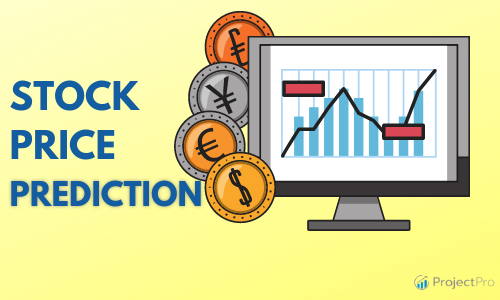

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

from plotly.offline import plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**
If we load large dataset directly,it create error when running. So we run dataset using encoding.

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Capstone Project 2 Regression/data_YesBank_StockPrices.csv')

# **Data Inspection**

In [ ]:
dataset.head(20)

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
5,2005-12-01,13.49,14.44,13.00,13.71
6,2006-01-01,13.68,17.16,13.58,15.33
7,2006-02-01,15.50,16.97,15.40,16.12
8,2006-03-01,16.20,20.95,16.02,20.08
9,2006-04-01,20.56,20.80,18.02,19.49


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
dataset.dropna(inplace=True)


In [ ]:
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset['Next_Month']=dataset['Close'].shift(-1)

In [ ]:
dataset['Target']=(dataset['Next_Month']>dataset['Close']).astype(int)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Next_Month,Target
0,2005-07-01,13.00,14.00,11.25,12.46,13.42,1
1,2005-08-01,12.58,14.88,12.55,13.42,13.30,0
2,2005-09-01,13.48,14.87,12.27,13.30,12.99,0
3,2005-10-01,13.20,14.47,12.40,12.99,13.41,1
4,2005-11-01,13.35,13.88,12.88,13.41,13.71,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


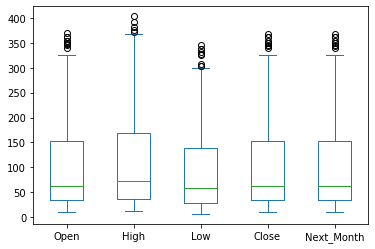

In [ ]:
dataset[['Open','High','Low','Close','Next_Month']].plot(kind='box')

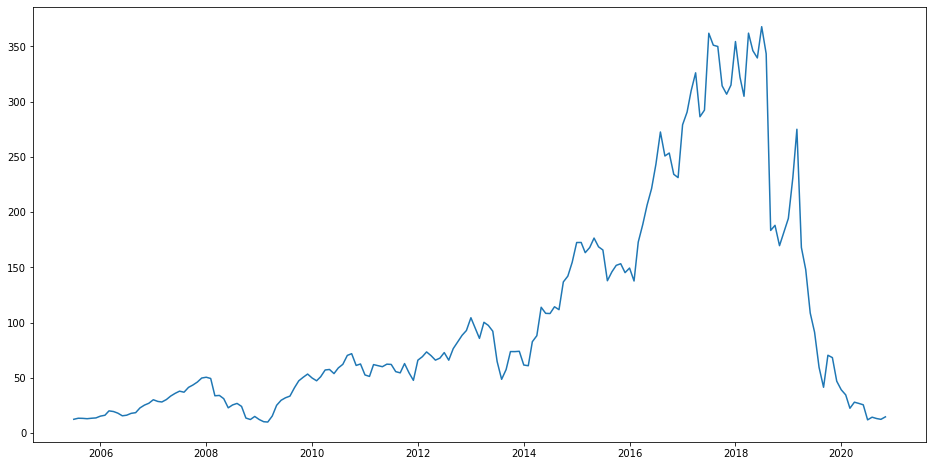

In [ ]:

#setting index as date
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['Close'], label='Close Price history')

In [ ]:
# Create a list of independent variables
independent_variables =['Close','Open','High','Low']

In [ ]:
X=np.array(dataset.index).reshape(-1,1)
y=dataset['Close']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg=regressor.fit(X_train, y_train)


In [ ]:
#Plot actual and predicted values
trace0=go.scatter(
    X=X_train.T[0],
    y=y_train,
    mode='markers',
    name='Actual'
)
trace1=go.scatter(
    X=X_train.T[0],
    y=model.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
dataset_data=[trace0,trace1]
layout.xaxis.title.text='Month'
plot2=go.figure(data=dataset,layout=layout)

TypeError: ignored

In [ ]:
reg.score(X_train, y_train)


0.3240228636060176

In [ ]:
reg.coef_

array([187.432075])

In [ ]:
reg.intercept_

6.506117174393651

In [ ]:
y_pred_train = reg.predict(X_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred

array([ 40.12165236, 133.83768986, 182.73301378, 120.59520631,
        68.64392465,  24.84186364, 146.06152084,  13.63668525,
        11.59938008, 171.52783538, 161.34130957, 177.63975087,
       132.81903728,  78.83045046, 164.39726731, 173.56514054,
        70.68122981,  44.19626269, 147.08017342,  61.51335658,
        51.32683076, 118.55790114, 175.60244571,  67.62527207,
       139.94960535, 180.69570862, 143.0055631 ,  10.5807275 ,
       116.52059598,  73.73718756, 166.43457247, 153.19208891,
        94.11023919, 124.66981663,  32.99108429,  62.53200916,
       144.02421568])

In [ ]:
y_test

33      34.06
125    145.23
173     46.95
112    142.08
61      62.22
18      30.16
137    231.26
7       16.12
5       13.71
162    194.30
152    304.90
168     91.30
124    153.30
71      62.38
155    339.60
164    275.05
63      71.86
37      26.83
138    279.10
54      49.84
44       9.98
110    111.70
166    147.95
60      58.99
131    221.30
171     70.45
134    250.85
4       13.41
108    108.21
66      52.59
157    343.40
144    361.96
86      76.44
116    163.31
26      41.36
55      47.32
135    253.52
Name: Close, dtype: float64

In [ ]:
mean_squared_error(y_test, y_pred)

6407.012344460116

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

78.15282091617372

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

80.04381515432729

In [ ]:
r2_score(y_train, y_pred_train)

0.3240228636060176

In [ ]:
r2_score(y_test, y_pred)

0.43078643831661867

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.43078643831661867
Adjusted R2 :  0.41452319369709356


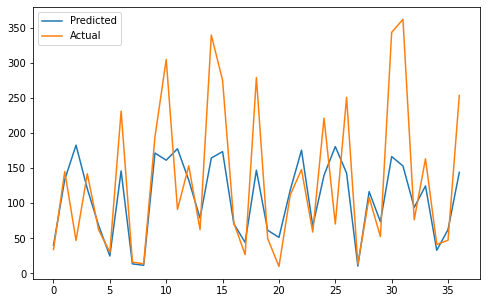

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     106.2
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           6.24e-20
Time:                        10:12:33   Log-Likelihood:                -1069.0
No. Observations:                 185   AIC:                             2142.
Df Residuals:                     183   BIC:                             2148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5608     11.515      0.222      0.824     -20.159      25.281
x1             1.1157      0.108     10.307      0.000       0.902       1.329
==============================================================================
Omnibus:                        7.332   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               11.936
Skew:                           0.133   Prob(JB):                      0.00256
Kurtosis:                       4.215   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.3240228635927377

In [ ]:
lasso.coef_

array([187.43087507])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.139e+05, tolerance: 1.027e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.290e+05, tolerance: 1.173e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+05, tolerance: 1.128e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -6670.3292003831275


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

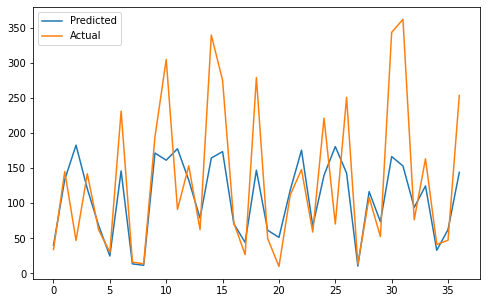

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6407.012344460118
RMSE : 80.0438151543273
R2 : 0.43078643831661845
Adjusted R2 :  0.41452319369709334


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
rid=ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -6554.921900991983


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
rid.score(X_train, y_train)

-6124.330121172095

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6642.789443684167
RMSE : 81.50330940326391
R2 : 0.4098394640956712
Adjusted R2 :  0.3929777344984047


In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.2779731382952383

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_en)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 7945.47130216758
RMSE : 89.13737320657133
R2 : 0.2941062423470322
Adjusted R2 :  0.2739378492712332


In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.471e+05, tolerance: 1.173e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+05, tolerance: 1.128e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.160e+05, tolerance: 1.123e+02

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}

Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -6660.978114317035


In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_elastic)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 6582.71183415365
RMSE : 81.13391297203438
R2 : 0.41517689568777016
Adjusted R2 :  0.3984676641359922


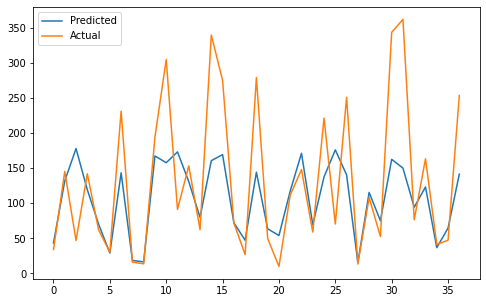

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

In [ ]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     106.2
Date:                Fri, 19 Aug 2022   Prob (F-statistic):           6.24e-20
Time:                        10:09:02   Log-Likelihood:                -1069.0
No. Observations:                 185   AIC:                             2142.
Df Residuals:                     183   BIC:                             2148.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5608     11.515      0.222      0.824     -20.159      25.281
x1             1.1157      0.108     10.307      0.000       0.902       1.329
==============================================================================
Omnibus:                        7.332   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.026   Jarque-Bera (JB):               11.936
Skew:                           0.133   Prob(JB):                      0.00256
Kurtosis:                       4.215   Cond. No.                         212.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Variable Description**

'Year': Year of terrorist attacks,

'Month':Month of terrorist attacks

'Day':Date of month of terrorist attacks

'Country':Contry of terrorist attacks

'Region':Region of terrorist attacks

'State':State of terrorist attacks

'City': City of terrorist attacks

'Latitude':Latitude of terrorist attacks

'Longitude':Longitude of terrorist attacks

'Attack_Type':Type of terrorist attacks

'Summary':A brief statement or account of the main points of terrorist attacks.

'Target': A person, object, or place selected as the aim of an attack.

'Weapon_type':Weapon used in terrorist attacks

'Kills': Number of people killed in terrorist attacks

'Wound': Number of people wounded in terrorist attacks

'Motive': Motive of terrorist attacks

'Terrorist_Group': Name of terrorist group 
